In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
covid19df=pd.read_csv('covid19_tweets.csv')
covid19df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [3]:
covid19df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [4]:
covid19df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [5]:
def plot_correlation_map( data ):
    corr = data.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })


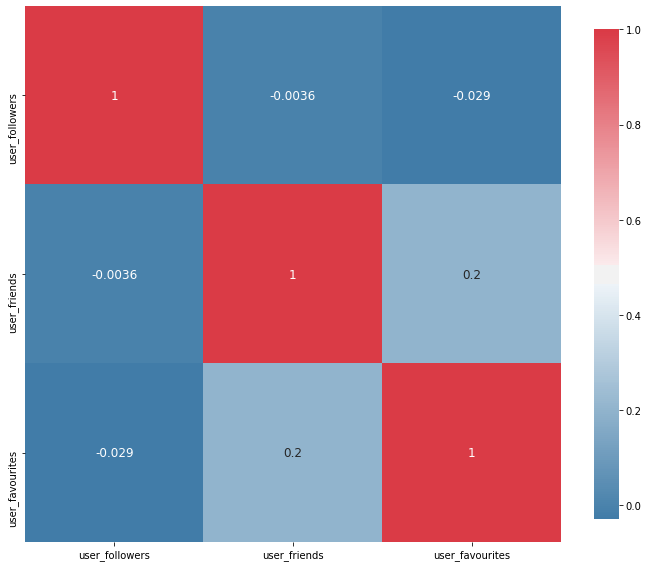

In [6]:
plot_correlation_map(covid19df[['user_followers','user_friends','user_favourites']])

In [7]:
missingvaldf = pd.DataFrame()
missingvaldf['column'] = covid19df.columns

missingvaldf['percent'] = [round(100* covid19df[col].isnull().sum() / len(covid19df), 2) for col in covid19df.columns]
missingvaldf = missingvaldf.sort_values('percent')
missingvaldf = missingvaldf[missingvaldf['percent']>0]
import plotly.express as px
fig = px.bar(
    missingvaldf, 
    x='percent', 
    y="column", 
    orientation='h', 
    title='Missing value percentage for each feature with percentage > 0', 
    height=1000, 
    width=1000,
    labels={"percent": "Percentage of Missing Values", "column": "Name of the Feature"}
)

fig.write_html("MissingValue.html",auto_open=True)

In [8]:
countofuserss = covid19df['user_name'].value_counts().reset_index()
countofuserss.columns = ['user_name', 'tweet_count']
countofuserss = countofuserss.sort_values(['tweet_count'])

fig = px.bar(
    countofuserss.tail(40), 
    x="tweet_count", 
    y="user_name", 
    orientation='h', 
    title='Top 40 users by total tweet count', 
    width=2000, 
    height=2000,
    labels={"tweet_count": "Total Number of Tweets", "user_name": "Username of the Twitter user"}
)
fig.write_html("UserNameVsTweetCount.html",auto_open=True)

In [9]:
covid19df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [10]:
#convert dates to datetime
covid19df['user_created'] = pd.to_datetime(covid19df['user_created'])
covid19df['year_created'] = covid19df['user_created'].dt.year
yearlyDFcopy = covid19df.drop_duplicates(subset='user_name', keep="first")
covid19df.drop(columns=['year_created'],axis=1,inplace=True)
yearlyDFcopy = yearlyDFcopy[yearlyDFcopy['year_created']>1970]
yearlyDFcopy = yearlyDFcopy['year_created'].value_counts().reset_index()
yearlyDFcopy.columns = ['year', 'number']

In [11]:
fig = px.bar(
    yearlyDFcopy, 
    x="year", 
    y="number", 
    orientation='v', 
    title='No. of Users Created by Year', 
    width=1200, 
    height=800,
    labels={"year": "Year of Creation", "number": "Total Number of Accounts Created"}
)

fig.write_html("YearAccountsCreated.html",auto_open=True)

In [12]:
lengthDF = covid19df.copy()
lengthDF['tweet_length'] = lengthDF['text'].str.len()

In [13]:
fig = px.histogram(
    lengthDF, 
    x="tweet_length", 
    nbins=80, 
    title='Distribution of the Length of All Tweets', 
    width=1200,
    height=1000,
    labels={'tweet_length':"Length of Individual Tweets"}
)
fig.write_html("LengthOfTweetsHistogram.html",auto_open=True)

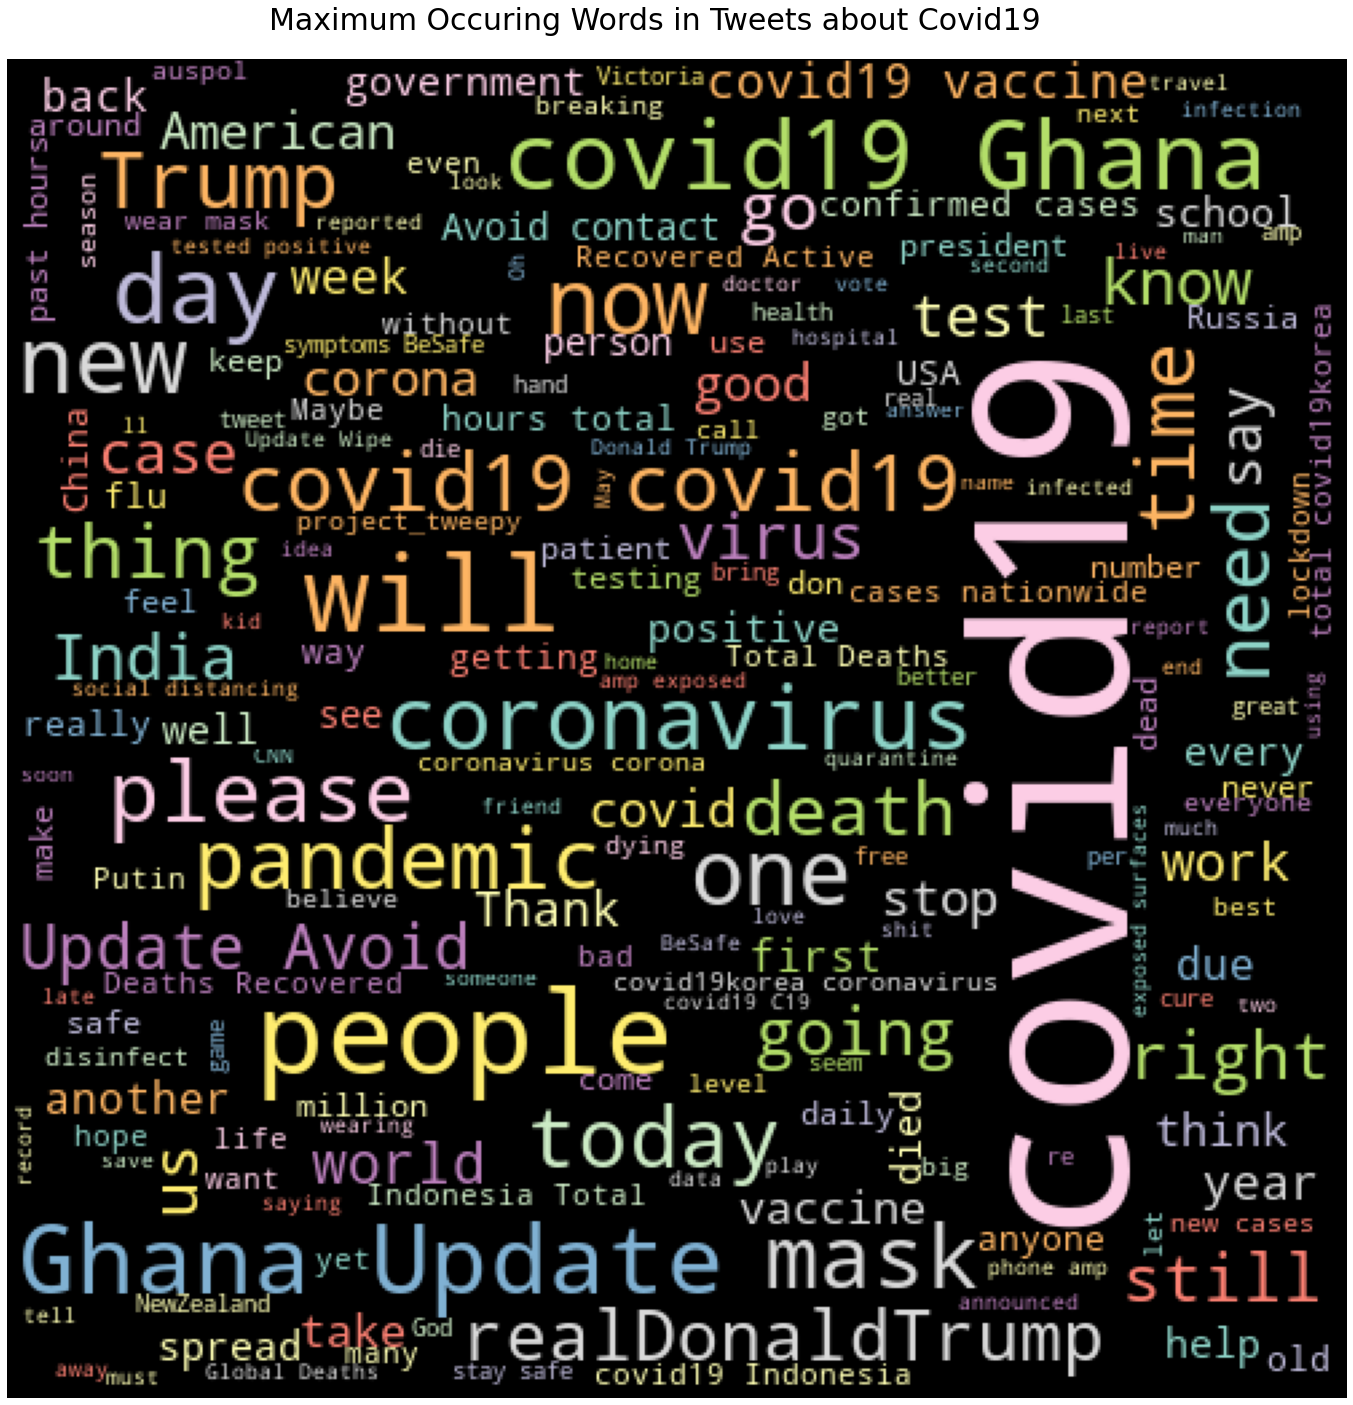

In [14]:
from wordcloud import WordCloud, STOPWORDS
text = ",".join(review for review in covid19df.text if 'COVID' not in review and 'https' not in review and 'Covid' not in review)
wordcloud = WordCloud(max_words=200, colormap='Set3',stopwords=set(STOPWORDS),background_color="black",
                      width=500,height=500, max_font_size=80,
                      random_state=600
                     ).generate(text)
fig = plt.figure(1, figsize=(24,24))
plt.axis('off')
fig.suptitle("Maximum Occuring Words in Tweets about Covid19", fontsize=30)
fig.subplots_adjust(top=1)
plt.imshow(wordcloud)
plt.savefig('TweetCloud.png')
plt.show()

In [15]:
import sweetviz as sv
sweetreport = sv.analyze(covid19df)
sweetreport.show_html("Covid19Overview.html")

:FEATURES DONE:                    |█████████████████████| [100%]   00:08  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)


Creating Associations graph... DONE!
Report Covid19Overview.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [16]:
import nltk
import re
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

def text_preprocessing(text):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    combined_text = ' '.join(tokenized_text)
    return combined_text

covid19df['text'] = covid19df['text'].apply(text_preprocessing)

In [18]:
pd.options.plotting.backend = "plotly"
#Source: https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(covid19df['text'], 15)
    
dfoftextcount = pd.DataFrame(common_words, columns = ['text' , 'count'])
fig = dfoftextcount.plot(kind='bar', x='text', y='count', color='count', color_continuous_scale='blues')
fig.update_layout(yaxis_title='Count',xaxis_title='Word',
                  width=1200, height=800,
                  title='Top 15 most occurring words in tweets')
fig.write_html("TopWords.html",auto_open=True)

In [19]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(covid19df['text'], 15)

dfoftextcount = pd.DataFrame(common_words, columns = ['text' , 'count'])
fig = dfoftextcount.plot(kind='bar', y='count', x='text', color='count', color_continuous_scale='greens')
fig.update_layout(yaxis_title='Count', xaxis_title='Bigrams',
                  width=1200, height=800,
                  title='Top 15 most occurring bigrams in tweets')
fig.write_html("TopBigrams.html",auto_open=True)

In [20]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(covid19df['text'], 15)

dfoftextcount = pd.DataFrame(common_words, columns = ['text' , 'count'])
fig = dfoftextcount.plot(kind='bar', y='count', x='text', color='count', color_continuous_scale='reds')
fig.update_layout(yaxis_title='Count', xaxis_title='Trigrams',
                  width=1200, height=800, 
                  title='Top 15 most occurring trigrams in tweets')
fig.write_html("TopTrigrams.html",auto_open=True)

In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\daksh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
model = SentimentIntensityAnalyzer()
def sentiment_score(txt):
    return model.polarity_scores(txt)['compound']
covid19df["nltkSentimentScore"] = covid19df["text"].apply(sentiment_score)

In [23]:
from textblob import TextBlob
covid19df['tbSentimentScore'] = covid19df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [24]:
covid19df.describe()

,user_followers,user_friends,user_favourites,nltkSentimentScore,tbSentimentScore
count,1.791080e+05,179108.000000,1.791080e+05,179108.000000,179108.000000
mean,1.090555e+05,2121.701566,1.444411e+04,0.051937,0.078940
std,8.414670e+05,9162.553072,4.452270e+04,0.401437,0.246432
min,0.000000e+00,0.000000,0.000000e+00,-0.985800,-1.000000
25%,1.720000e+02,148.000000,2.060000e+02,-0.128000,0.000000
50%,9.920000e+02,542.000000,1.791000e+03,0.000000,0.000000
75%,5.284000e+03,1725.250000,9.388000e+03,0.361200,0.199169
max,4.944256e+07,497363.000000,2.047197e+06,0.975000,1.000000


In [25]:
#clean sentiment score to clear classes
covid19df.loc[covid19df.nltkSentimentScore >= 0.3,"nltkSentimentScore"] = 1.0
covid19df.loc[covid19df.nltkSentimentScore <= -0.3,"nltkSentimentScore"] = -1.0
covid19df.loc[(covid19df.nltkSentimentScore > -0.3) & (covid19df.nltkSentimentScore < 0.3), "nltkSentimentScore"] = 0.0

covid19df.loc[covid19df.tbSentimentScore >= 0.3,"tbSentimentScore"] = 1.0
covid19df.loc[covid19df.tbSentimentScore <= -0.3,"tbSentimentScore"] = -1.0
covid19df.loc[(covid19df.tbSentimentScore > -0.3) & (covid19df.tbSentimentScore < 0.3), "tbSentimentScore"] = 0.0

In [26]:
covid19df.describe()

,user_followers,user_friends,user_favourites,nltkSentimentScore,tbSentimentScore
count,1.791080e+05,179108.000000,1.791080e+05,179108.000000,179108.000000
mean,1.090555e+05,2121.701566,1.444411e+04,0.098700,0.112362
std,8.414670e+05,9162.553072,4.452270e+04,0.683432,0.445088
min,0.000000e+00,0.000000,0.000000e+00,-1.000000,-1.000000
25%,1.720000e+02,148.000000,2.060000e+02,0.000000,0.000000
50%,9.920000e+02,542.000000,1.791000e+03,0.000000,0.000000
75%,5.284000e+03,1725.250000,9.388000e+03,1.000000,0.000000
max,4.944256e+07,497363.000000,2.047197e+06,1.000000,1.000000


In [27]:
covid19df.tbSentimentScore.value_counts()

 0.0    141365
 1.0     28934
-1.0      8809
Name: tbSentimentScore, dtype: int64

In [28]:
covid19df.nltkSentimentScore.value_counts()

 0.0    93706
 1.0    51540
-1.0    33862
Name: nltkSentimentScore, dtype: int64

In [30]:
covid19df['TBSentiment'] = ""
covid19df.loc[covid19df.tbSentimentScore == -1, 'TBSentiment'] = "Negative"
covid19df.loc[covid19df.tbSentimentScore == 0, 'TBSentiment'] = "Neutral"
covid19df.loc[covid19df.tbSentimentScore == 1, 'TBSentiment'] = "Positive"
covid19df['NLTKSentiment'] = ""
covid19df.loc[covid19df.nltkSentimentScore == -1, 'NLTKSentiment'] = "Negative"
covid19df.loc[covid19df.nltkSentimentScore == 0, 'NLTKSentiment'] = "Neutral"
covid19df.loc[covid19df.nltkSentimentScore == 1, 'NLTKSentiment'] = "Positive"

In [31]:
tbVC = covid19df.TBSentiment.value_counts()
nltkVC = covid19df.NLTKSentiment.value_counts()

In [32]:
pie_chart = go.Figure()
pie_chart.add_trace(go.Pie(labels=tbVC.index,values=tbVC.values))
pie_chart.update_traces(textposition='inside', textinfo='percent+label',\
                               marker=dict(colors=['darkorange','gold','red'], line=dict(color='#000000', width=2)))
pie_chart.update_layout(height=1000, width=1000, title_text="Distribution of the Covid19 Tweet Sentiment By Text Blob analysis")
pie_chart.write_html("TextBlobSentiment.html",auto_open=True)

In [33]:
pie_chart = go.Figure()
pie_chart.add_trace(go.Pie(labels=nltkVC.index,values=nltkVC.values))
pie_chart.update_traces(textposition='inside', textinfo='percent+label',\
                               marker=dict(colors=['darkorange','gold','red'], line=dict(color='#000000', width=2)))
pie_chart.update_layout(height=1000, width=1000, title_text="Distribution of the Covid19 Tweet Sentiment By Vader Lexicon NLTK analysis")
pie_chart.write_html("NLTKSentiment.html",auto_open=True)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
x_train, x_validation, y_train, y_validation = train_test_split(covid19df['text'], covid19df['NLTKSentiment'], 
                                                                test_size=.3, random_state=2000)

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(stop_words='english',max_df = 0.5,smooth_idf=True, max_features=10000, ngram_range=(1,4))
svcPipeline = Pipeline([('vectorizer', vectorizer),('classifier', LinearSVC(C=1000))])
mnbPipeline = Pipeline([('vectorizer',vectorizer),('classifier', MultinomialNB())])

In [37]:
mnbModel = mnbPipeline.fit(x_train,y_train)

In [38]:
svcModel = svcPipeline.fit(x_train,y_train)

F:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
def getPredDict(model,modelName):
    yPred = model.predict(x_validation)
    accuracy = accuracy_score(y_validation,yPred)
    f1score = f1_score(y_validation,yPred,average=None)
    confusionMatrix = confusion_matrix(y_validation, yPred, labels = ['Positive', 'Negative', 'Neutral'])
    return {'name':modelName,'accuracyScore':accuracy,'f1Score':f1score,'confusionMatrix':confusionMatrix}

In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(title + ".png")
    plt.show()

In [48]:
modelCrossVal = [getPredDict(svcModel,"SVC"),getPredDict(mnbModel,"MNB")]
crossValDF = pd.DataFrame(modelCrossVal)
crossValDF.head()

,name,accuracyScore,f1Score,confusionMatrix
0,SVC,0.815030,"[0.7644833177730824, 0.8430989257013015, 0.791...","[[10784, 332, 4221], [216, 7779, 2284], [925, ..."
1,MNB,0.756872,"[0.6156841272738334, 0.8029605418231531, 0.734...","[[10060, 201, 5076], [324, 5060, 4895], [1671,..."


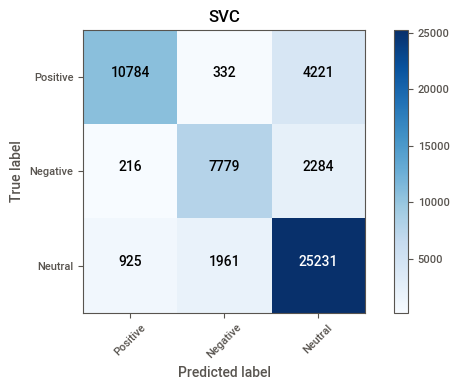

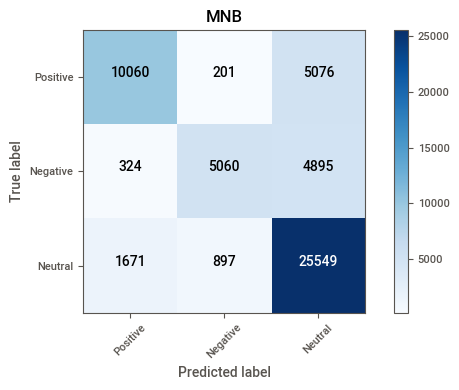

In [54]:
for index, row in crossValDF.iterrows():
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(row.confusionMatrix,classes=['Positive', 'Negative', 'Neutral'],title=row['name'])